## Imports

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from datatile.summary.df import DataFrameSummary
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib

This is a fictional data set created by IBM data scientists to explore attrition and employee retention rates, usually this is data that would be gathered by the Human resources department.

In [4]:
# ref: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
ec_df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
ec_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
ec_df.shape

(1470, 35)

The dataset we are working with is an imbalanced dataset because only about 16% of the records belong to the positive class

In [7]:
ec_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
list(ec_df.columns)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

## Exploratory Data Analysis

A columnwise summarization of the employee churn data

In [9]:
# ref : https://towardsdatascience.com/explore-pandas-dataframe-with-datatile-59c425b55d01
dfs = DataFrameSummary(ec_df)
dfs.summary()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,NaN,NaN,1470.0,NaN,1470.0,1470.0,NaN,1470.0,1470.0,1470.0,NaN,1470.0,1470.0,1470.0,NaN,1470.0,NaN,1470.0,1470.0,1470.0,NaN,NaN,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.92381,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.79932,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.5091,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.10694,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.22243,3.568136
min,18.0,NaN,NaN,102.0,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,30.0,1.0,1.0,NaN,1.0,NaN,1009.0,2094.0,0.0,NaN,NaN,11.0,3.0,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,NaN,NaN,465.0,NaN,2.0,2.0,NaN,1.0,491.25,2.0,NaN,48.0,2.0,1.0,NaN,2.0,NaN,2911.0,8047.0,1.0,NaN,NaN,12.0,3.0,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,NaN,NaN,802.0,NaN,7.0,3.0,NaN,1.0,1020.5,3.0,NaN,66.0,3.0,2.0,NaN,3.0,NaN,4919.0,14235.5,2.0,NaN,NaN,14.0,3.0,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,NaN,NaN,1157.0,NaN,14.0,4.0,NaN,1.0,1555.75,4.0,NaN,83.75,3.0,3.0,NaN,4.0,NaN,8379.0,20461.5,4.0,NaN,NaN,18.0,3.0,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,NaN,NaN,1499.0,NaN,29.0,5.0,NaN,1.0,2068.0,4.0,NaN,100.0,4.0,5.0,NaN,4.0,NaN,19999.0,26999.0,9.0,NaN,NaN,25.0,4.0,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0
counts,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
uniques,43,2,3,886,3,29,5,6,1,1470,4,2,71,4,5,9,4,3,1349,1427,10,1,2,15,2,4,1,4,40,7,4,37,19,16,18


Based on the above data we can conclude the following - 
1. The data is complete and has no missing data in any of the columns, the reason for this is that HR Analytics data usually has a complete details on all the employee's personal data on-file. 


2. It consists of numerical Categorical columns which are encoded as follows : 

    1. Education
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'

    2. EnvironmentSatisfaction
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'

    3. JobInvolvement
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'

    4. JobSatisfaction
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'

    5. PerformanceRating
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'

    6. RelationshipSatisfaction
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'

    7. WorkLifeBalance
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
    
    
3. It also consists of other categorical columns such as gender, marital status, education field .etc.

### Exploring the Numerical columns

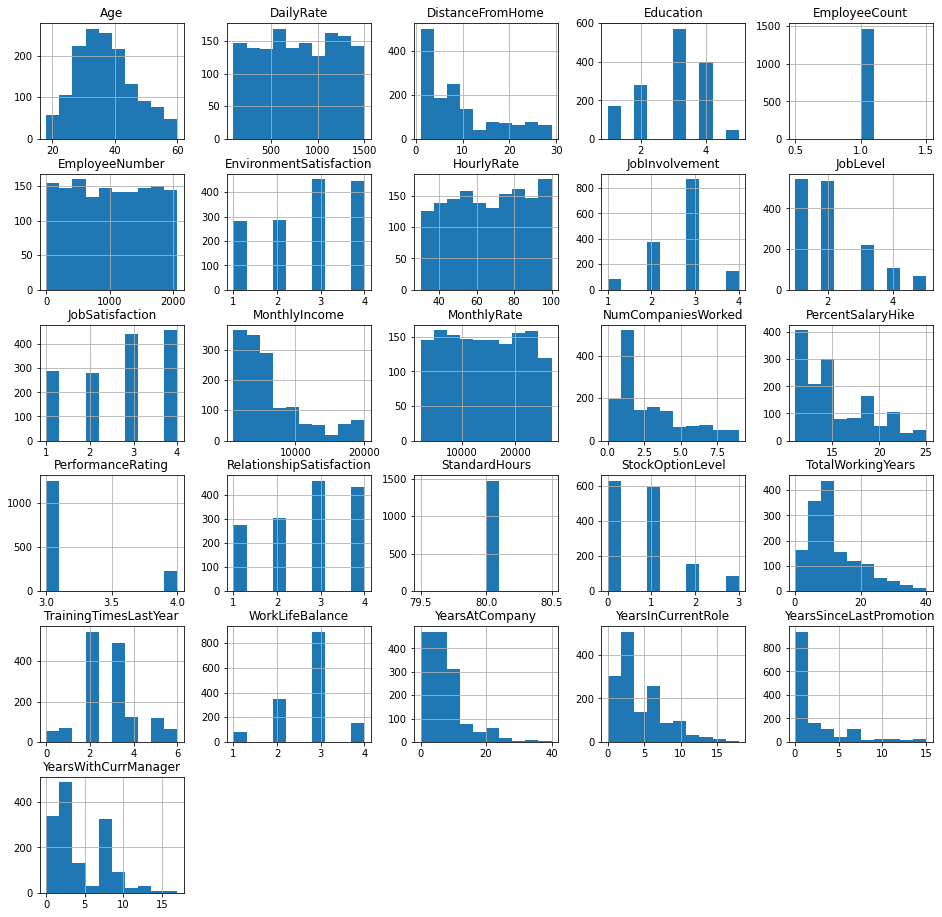

In [10]:
ec_df.hist(figsize=(16,16))
plt.show()

Key Takeaways : 
1. The data seems to be quite skewed in the case of Monthly income, salary hikes, distance from home .etc. 


2. A majority of the employees are in the age ranges of 30 - 45.


3. A majority of the employees seem to have worked for the company for 0-25 years.

Pairplots to help understand the relation between seelected columns

In [11]:
temp = ec_df[['Age','Attrition','DistanceFromHome', 'MonthlyIncome','PercentSalaryHike',
       'PerformanceRating', 'TotalWorkingYears',
    'YearsAtCompany','YearsSinceLastPromotion']]

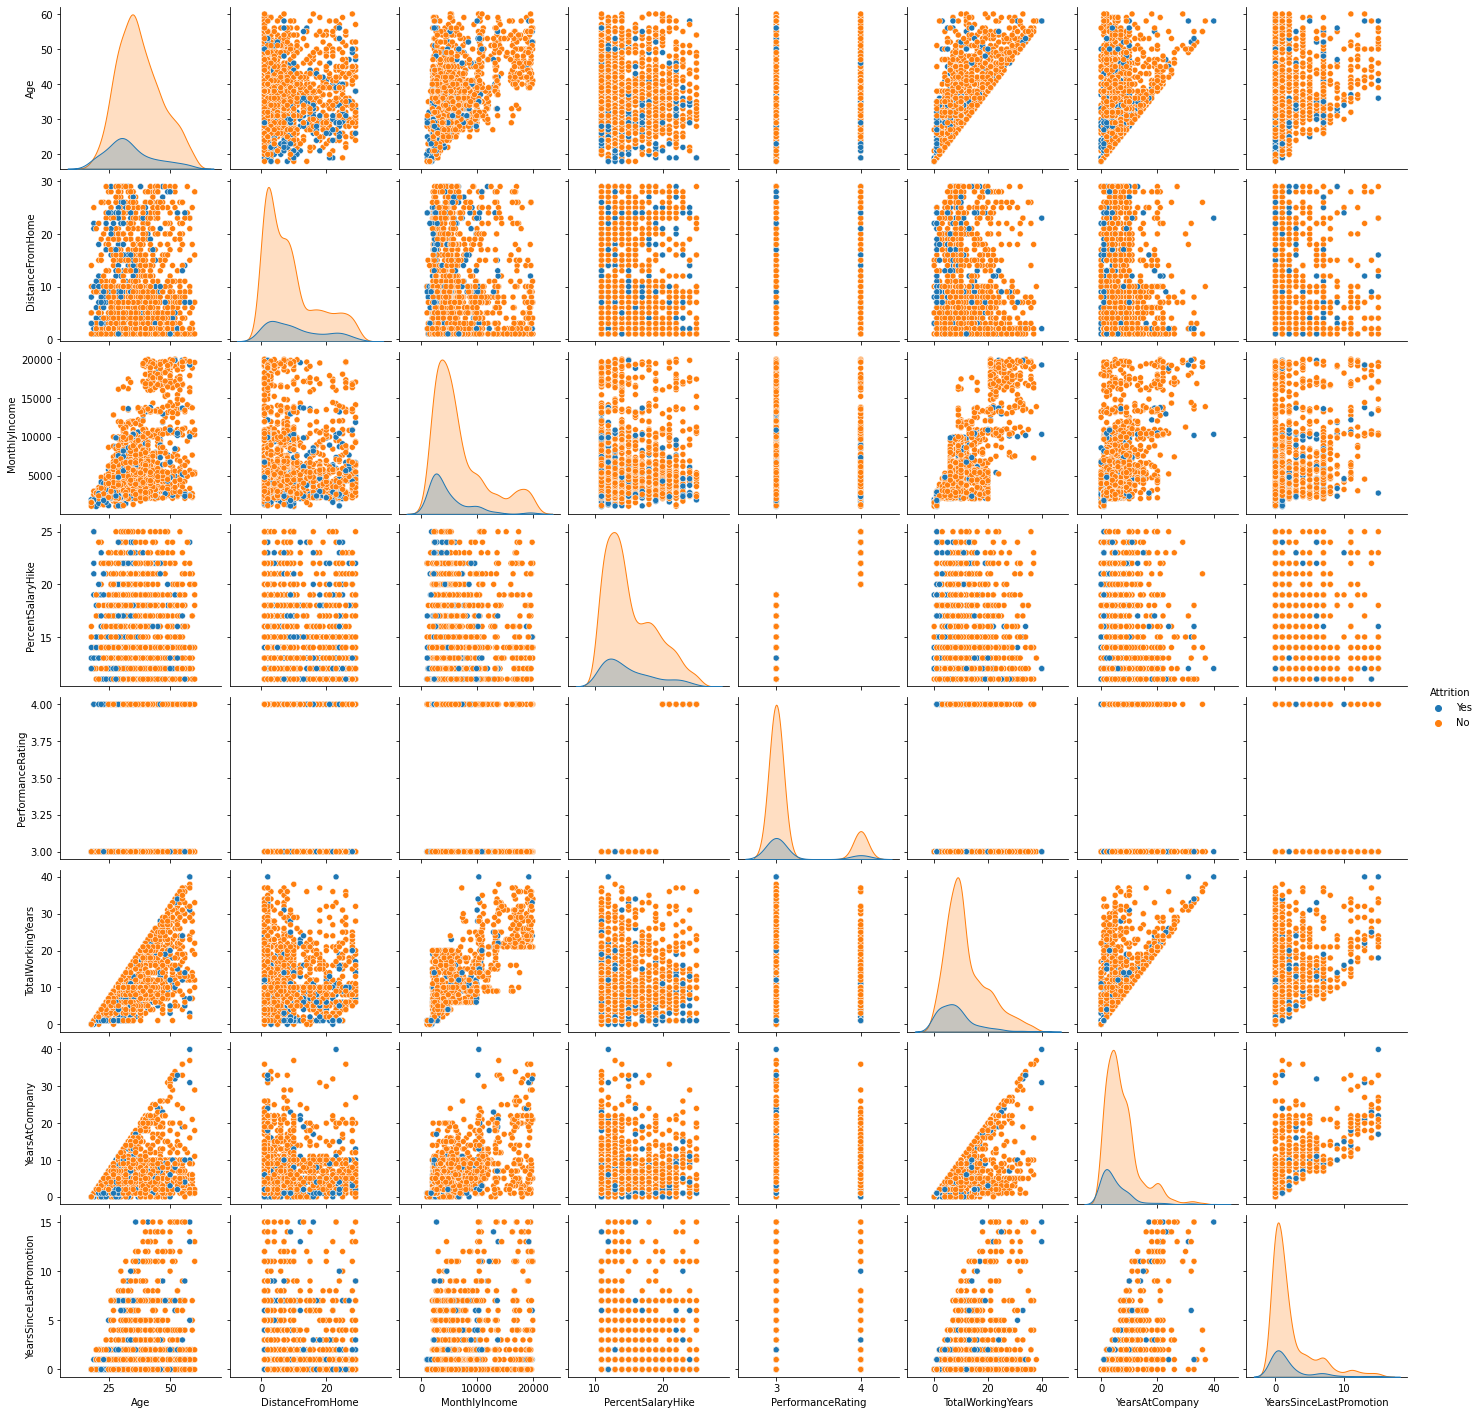

In [12]:
sns.pairplot(temp,hue='Attrition')
# sns.set(font_scale=5)
plt.rcParams.update({'font.size': 15})

Insights 
..

.

.

.

.

.


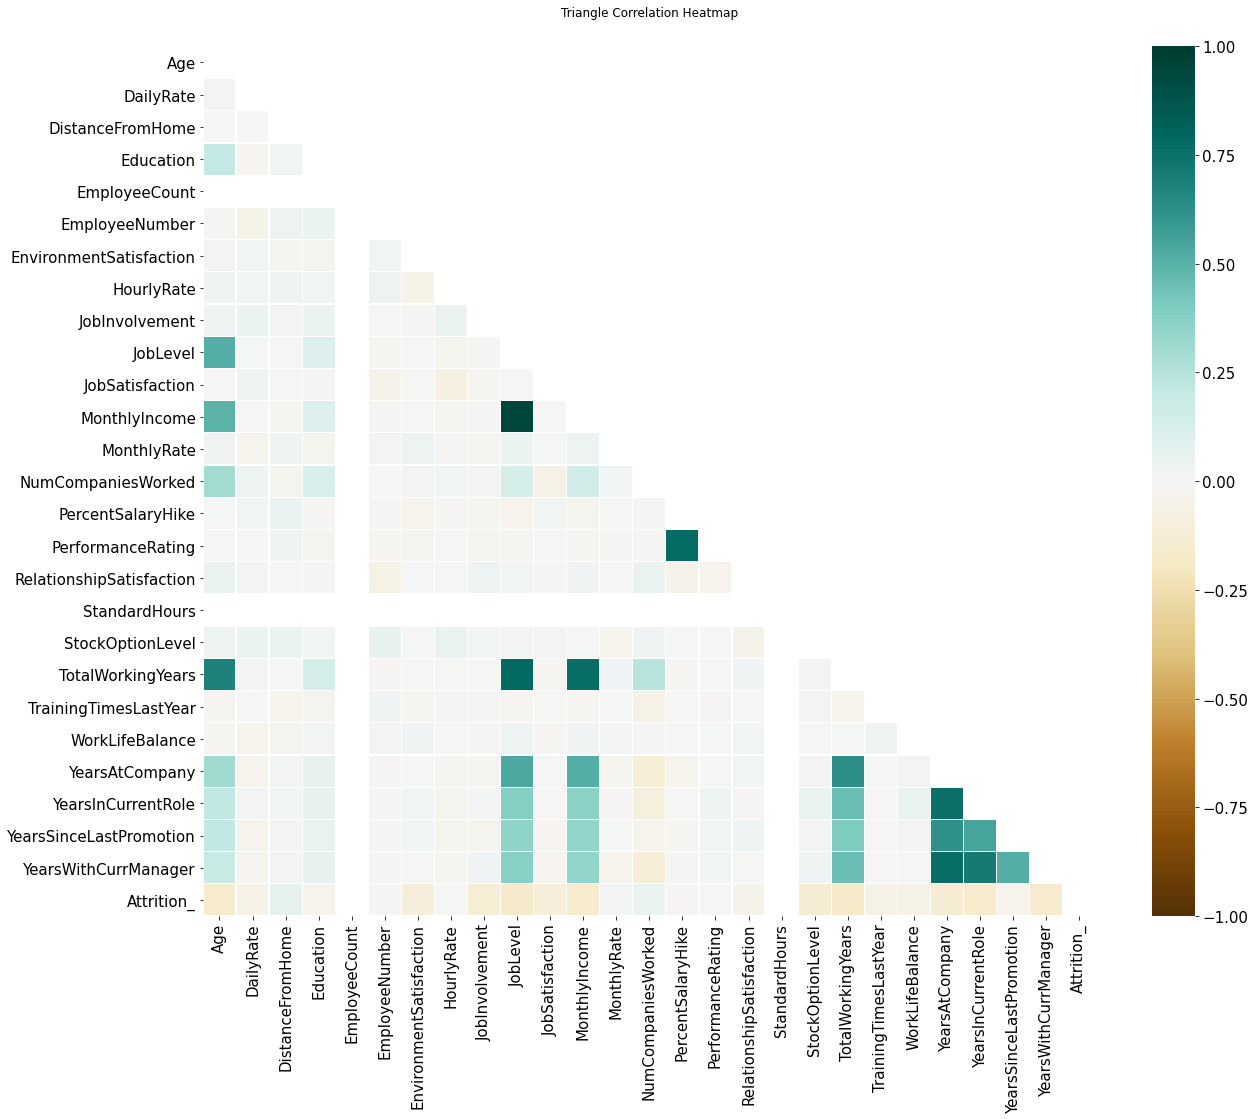

In [13]:
# Ref : https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
plt.figure(figsize=(20, 16))
# increase the font size 
# define the mask to set the values in the upper triangle to True
df_corr = ec_df.copy()
df_corr['Attrition_'] = np.where((df_corr['Attrition'] == 'Yes'), 1, 0)
mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_corr.corr(), mask=mask, vmin=-1, vmax=1,cmap='BrBG',linewidths=.2)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=30);
plt.rcParams.update({'font.size': 10})

From the above plots it seems like age, job level, monthly income are important columns that we can explore. We can also explore their overtime, Distance from home, marital status, employee satisfaction. 

In [14]:
ec_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Analysis related to Personal factors such as martial status, age, distance from work, gender

#### Age based analysis

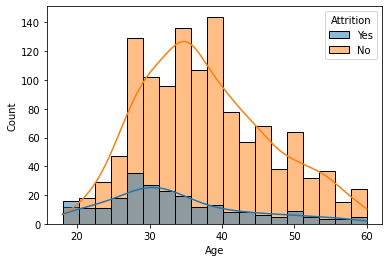

In [15]:
sns.histplot(data=ec_df,x='Age',kde=True,hue='Attrition')
plt.show()

Let us use a Kernel Density estimator plot as it is easier to interpret as compared to a histogram plot

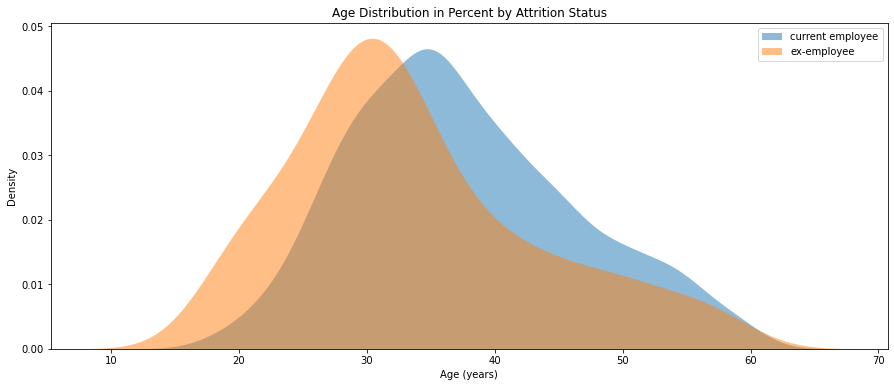

In [16]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'Age'],label='current employee' ,fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'Age'],label='ex-employee' ,fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Attrition Status');

Insight

#### Marital Status based analysis

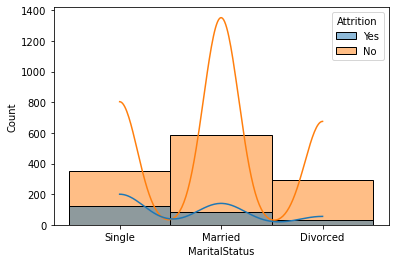

In [17]:
sns.histplot(data=ec_df,x='MaritalStatus',kde=True,hue='Attrition')
plt.show()

Let us use a Kernel Density edstimator plot as it is easier to interpret as compared to a histogram plot

Insight

#### Vicinity to work based analysis

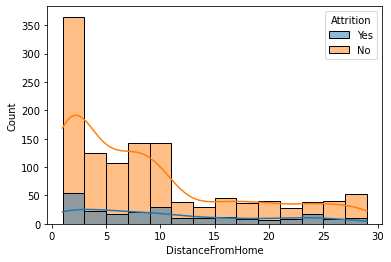

In [18]:
sns.histplot(data=ec_df,x='DistanceFromHome',kde=True,hue='Attrition')
plt.show()

Let us use a Kernel Density edstimator plot as it is easier to interpret as compared to a histogram plot

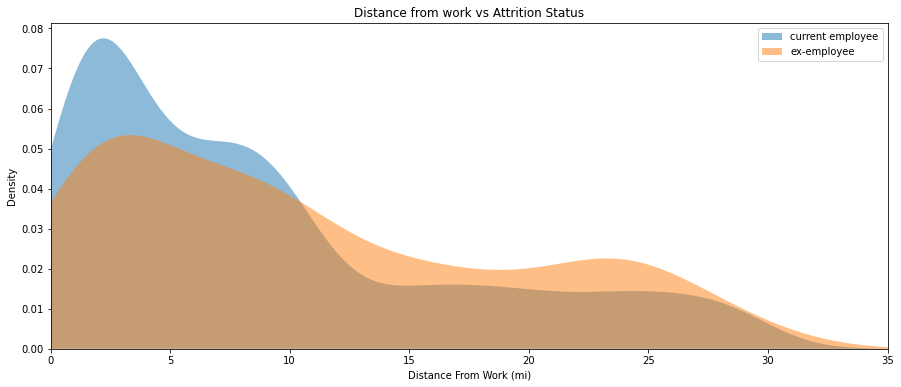

In [19]:
#ref https://seaborn.pydata.org/generated/seaborn.kdeplot.html
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'DistanceFromHome'],label='current employee',fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'DistanceFromHome'],label='ex-employee' ,fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
# sns.set(font_scale = 2.5)
# sns.set_style("ticks",{'axes.grid' : False})
plt.xlabel('Distance From Work (mi)')
plt.xlim(0,35)
plt.ylabel('Density')
plt.legend()
plt.title('Distance from work vs Attrition Status');

Insight

#### Gender based analysis

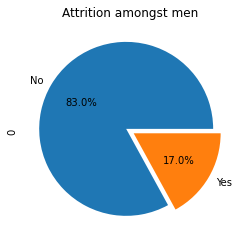

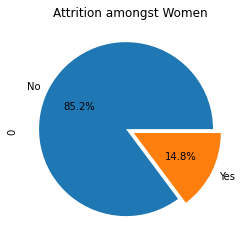

In [20]:
# sns.histplot(data=ec_df,x='Gender',kde=True,hue='Attrition')
# plt.show()
data = ec_df[['Gender','Attrition']].value_counts().reset_index()
# display(data)
data_male = data[data['Gender']=='Male'].set_index('Attrition')
data_male[0].plot.pie(autopct='%.1f%%',explode=[0.05]*2)
plt.title('Attrition amongst men')
plt.show()
# sns.set(font_scale = 1.5)
data_female = data[data['Gender']=='Female'].set_index('Attrition')
data_female[0].plot.pie(autopct='%.1f%%',explode=[0.05]*2)
plt.title('Attrition amongst Women')
plt.show()



In [21]:
temp = ec_df.groupby(['Gender','JobLevel'],as_index=False).MonthlyIncome.mean()

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

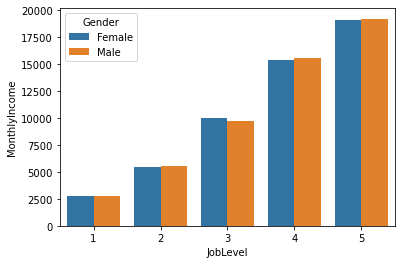

In [22]:
sns.barplot(data=temp,x='JobLevel',y='MonthlyIncome',hue='Gender')

# sns.set(font_scale=1.3)
# sns.set_style("ticks",{'axes.grid' : False})

In [23]:
temp

,Gender,JobLevel,MonthlyIncome
0,Female,1,2780.487437
1,Female,2,5435.327273
2,Female,3,9962.702128
3,Female,4,15431.372549
4,Female,5,19129.916667
5,Male,1,2790.633721
6,Male,2,5549.184713
7,Male,3,9706.991935
8,Male,4,15570.927273
9,Male,5,19224.844444


Insight

Age based analysis

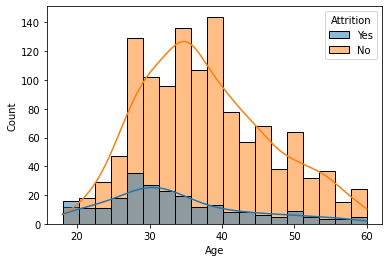

In [24]:
sns.histplot(data=ec_df,x='Age',kde=True,hue='Attrition')
plt.show()

Let us use a Kernel Density edstimator plot as it is easier to interpret as compared to a histogram plot

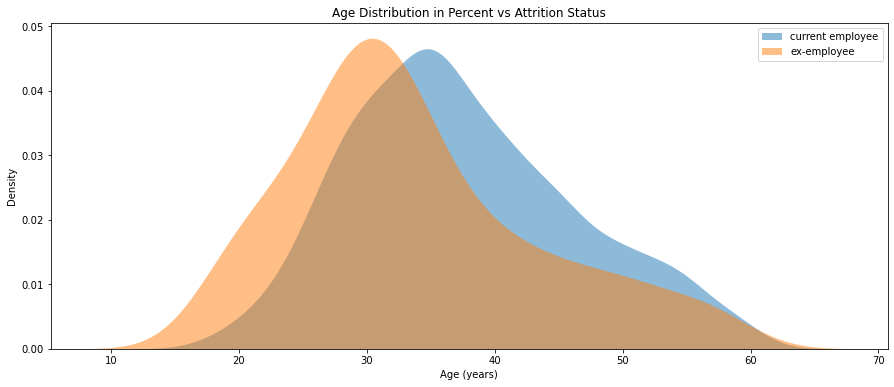

In [25]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'Age'],label='current employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'Age'],label='ex-employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent vs Attrition Status');

Insight

### Analysis related to Job / Job prospects such as salary, satisfation, worklife balance, salary hike, performance rating

#### Job Level

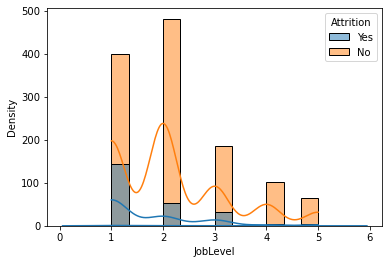

In [26]:
# plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition']=='Yes', 'JobLevel'])
sns.histplot(data=ec_df,x='JobLevel',kde=True,hue='Attrition')
plt.show()
# plt.xlabel('Age (years)')
# plt.ylabel('Density')
# plt.grid(True, alpha=0.5)
# plt.xlim(18, 65)
# plt.title('Age Distribution in Percent by Attrition Status')

 KDE Plot that helps us understand the effect of level on attrition rate

Text(0.5, 1.0, 'Job Level vs Attrition ')

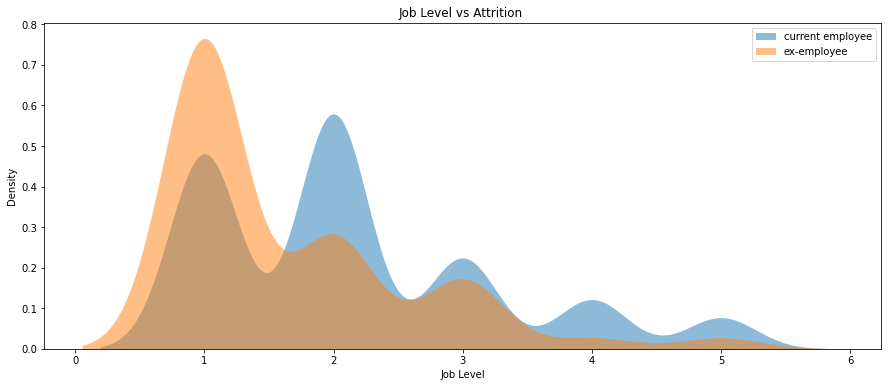

In [27]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'JobLevel'],label='current employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'JobLevel'],label='ex-employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
plt.xlabel('Job Level')
plt.ylabel('Density')
plt.legend()
plt.title('Job Level vs Attrition ')

Insight

#### Job Involvement

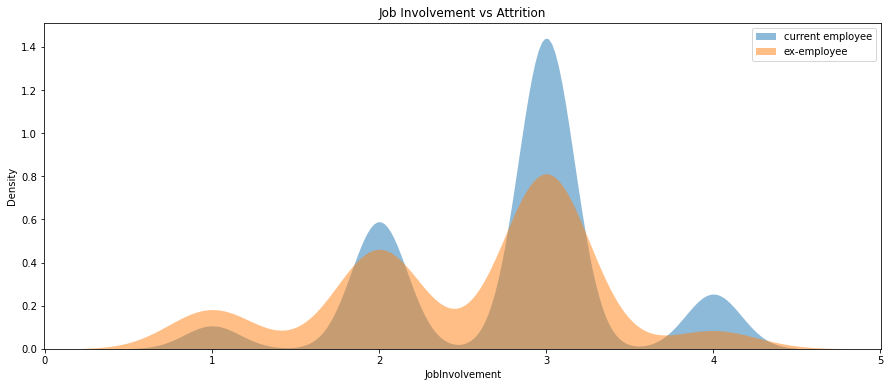

In [28]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'JobInvolvement'],label='current employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'JobInvolvement'],label='ex-employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
plt.xlabel('JobInvolvement')
plt.ylabel('Density')
plt.legend()
plt.title('Job Involvement vs Attrition')
plt.show()

Insight

#### Salary

Text(0.5, 1.0, 'Income vs Attrition')

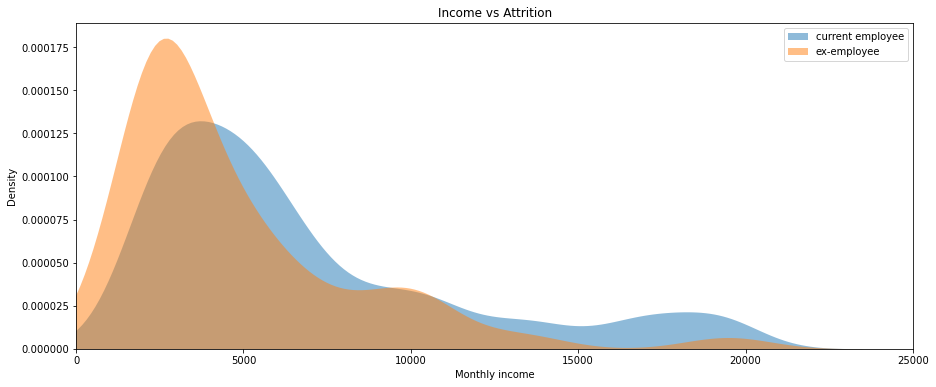

In [29]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'MonthlyIncome'],label='current employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'MonthlyIncome'],label='ex-employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
plt.xlabel('Monthly income')
plt.xlim(0,25000)
plt.ylabel('Density')
plt.legend()
plt.title('Income vs Attrition')

#### Salary Hike

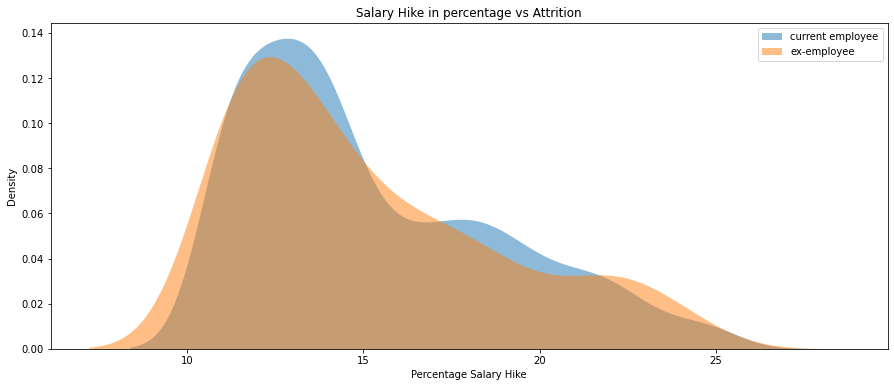

In [30]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'PercentSalaryHike'],label='current employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'PercentSalaryHike'],label='ex-employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
plt.xlabel('Percentage Salary Hike')
plt.ylabel('Density')
plt.legend()
plt.title('Salary Hike in percentage vs Attrition')
plt.show()

Insight

#### Number of companies worked 

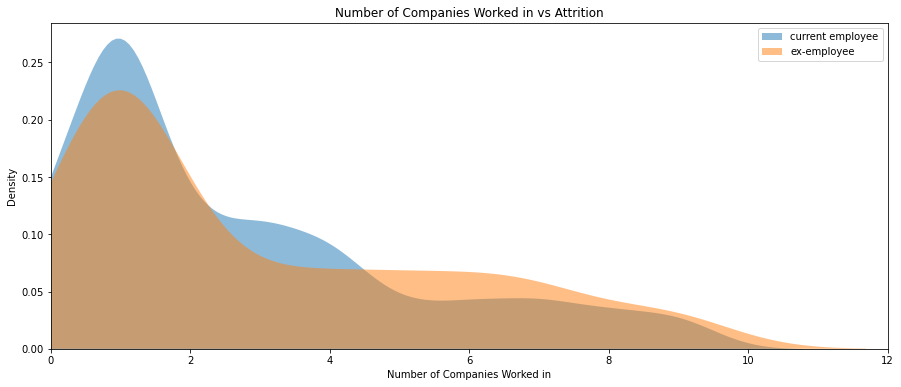

In [31]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'NumCompaniesWorked'],label='current employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'NumCompaniesWorked'],label='ex-employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
plt.xlabel('Number of Companies Worked in')
plt.ylabel('Density')
plt.xlim(0,12)
plt.legend()
plt.title('Number of Companies Worked in vs Attrition')
plt.show()

Insight

#### Overtime

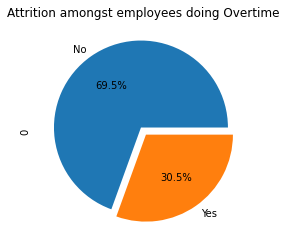

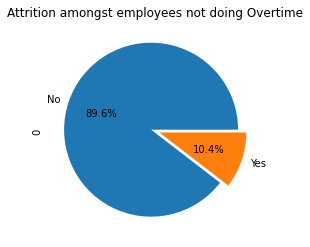

In [32]:
# sns.histplot(data=ec_df,x='Gender',kde=True,hue='Attrition')
# plt.show()
data = ec_df[['OverTime','Attrition']].value_counts().reset_index()
# display(data)
data_overtime = data[data['OverTime']=='Yes'].set_index('Attrition')
data_overtime[0].plot.pie(autopct='%.1f%%',explode=[0.05]*2)
plt.title('Attrition amongst employees doing Overtime')
plt.show()

data_no_overtime = data[data['OverTime']=='No'].set_index('Attrition')
data_no_overtime[0].plot.pie(autopct='%.1f%%',explode=[0.05]*2)
plt.title('Attrition amongst employees not doing Overtime')
plt.show()



Insight

#### Work-Life Balance

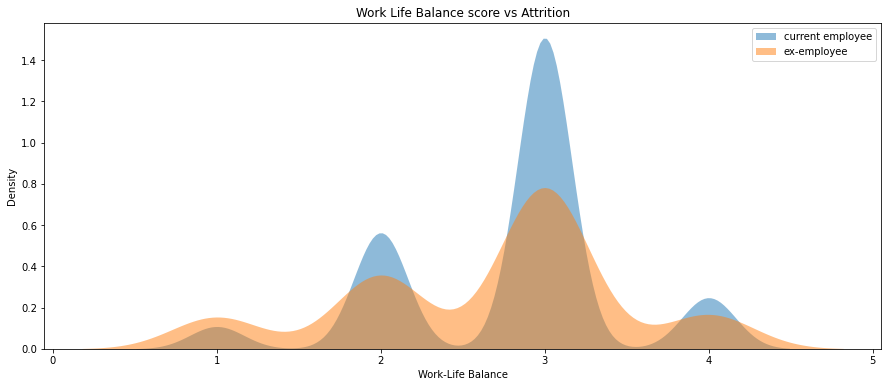

In [33]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'WorkLifeBalance'],label='current employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'WorkLifeBalance'],label='ex-employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
plt.xlabel('Work-Life Balance')
plt.ylabel('Density')
plt.legend()
plt.title('Work Life Balance score vs Attrition')
plt.show()

Insight

#### Performance Rating

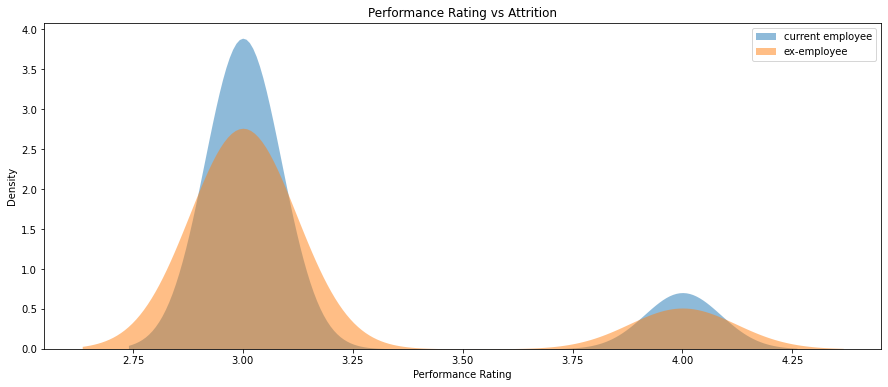

In [34]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'PerformanceRating'],label='current employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'PerformanceRating'],label='ex-employee', fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0,)
plt.xlabel('Performance Rating')
plt.ylabel('Density')
plt.legend()
plt.title('Performance Rating vs Attrition')
plt.show()

Insight

#### Stock Option Level

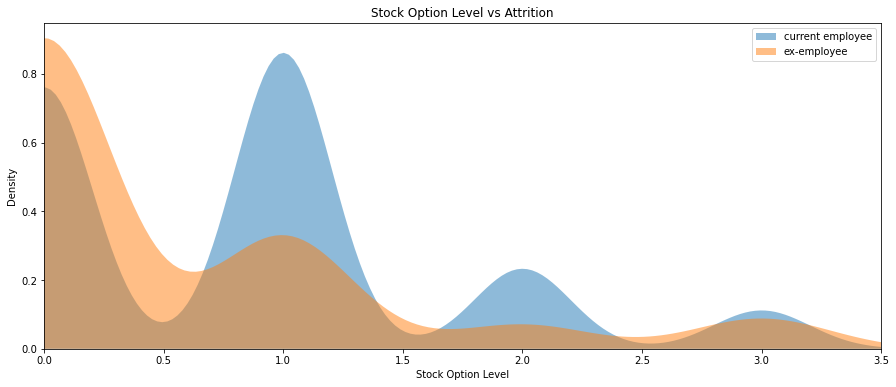

In [35]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'StockOptionLevel'],label='current employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'StockOptionLevel'],label='ex-employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
# sns.set(font_scale = 2)
# sns.set_style("ticks",{'axes.grid' : False})
plt.xlabel('Stock Option Level')
plt.ylabel('Density')
plt.xlim(0,3.5)
plt.legend()
plt.title('Stock Option Level vs Attrition')
plt.show()

Insight

#### Performance Rating

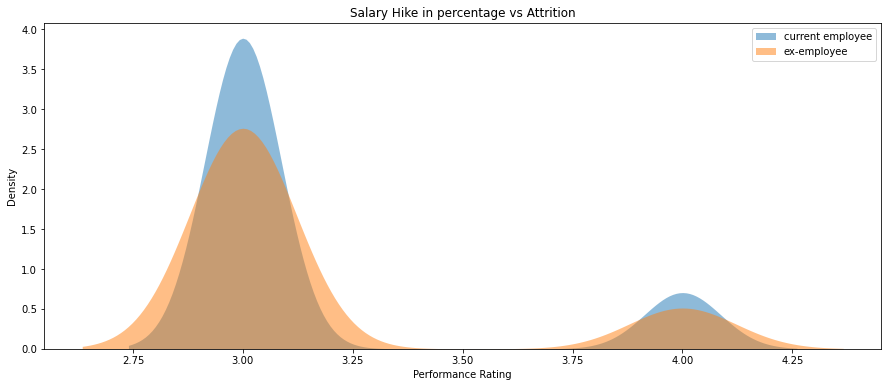

In [36]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'PerformanceRating'],label='current employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'PerformanceRating'],label='ex-employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
plt.xlabel('Performance Rating')
plt.ylabel('Density')
plt.legend()
plt.title('Salary Hike in percentage vs Attrition')
plt.show()

Insight

#### Years at Company

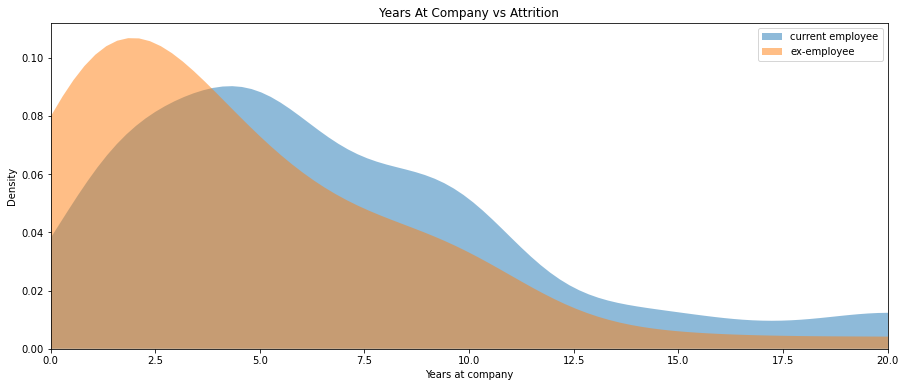

In [37]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'YearsAtCompany'],label='current employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'YearsAtCompany'],label='ex-employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
plt.xlabel('Years at company')
plt.xlim(0,20)
plt.ylabel('Density')
plt.legend()
plt.title('Years At Company vs Attrition')
plt.show()

Insight

#### Years since last Promotion

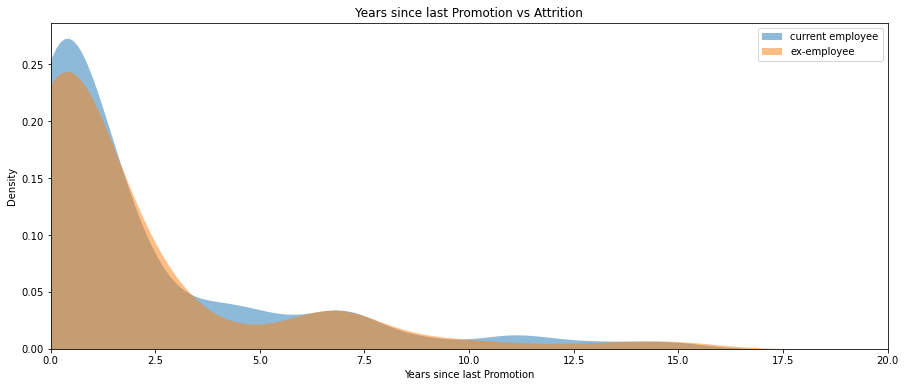

In [38]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'YearsSinceLastPromotion'],label='current employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'YearsSinceLastPromotion'],label='ex-employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
plt.xlabel('Years since last Promotion')
plt.xlim(0,20)
plt.ylabel('Density')
plt.legend()
plt.title('Years since last Promotion vs Attrition')
plt.show()

Insight

#### Years in Current Role

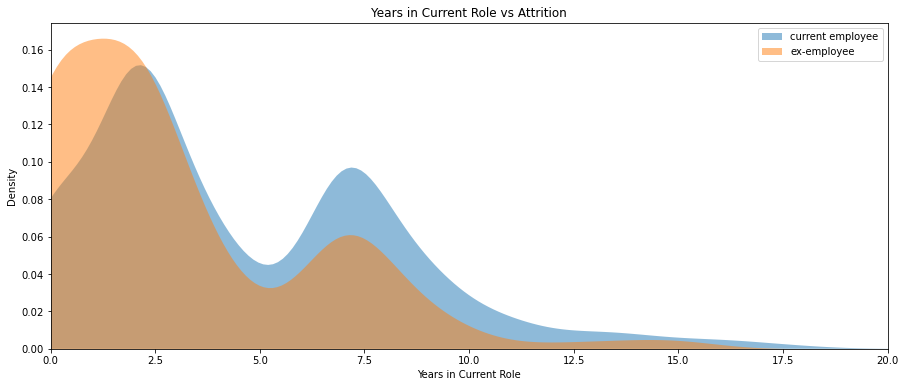

In [39]:
plt.figure(figsize=(15,6))
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'No', 'YearsInCurrentRole'],label='current employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
sns.kdeplot(ec_df.loc[ec_df['Attrition'] == 'Yes', 'YearsInCurrentRole'],label='ex-employee', fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
plt.xlabel('Years in Current Role')
plt.xlim(0,20)
plt.ylabel('Density')
plt.legend()
plt.title('Years in Current Role vs Attrition')
plt.show()

### Preprocessing pipeline

In [60]:
#Getting the columns that are categorical and the ones that are numerical
columns = ec_df.columns

In [61]:
categorical_columns = []
numerical_columns = []
for i in columns:
    if ec_df[i].dtype == 'object':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
numeric_pipeline = Pipeline(steps = [('num_imputer',SimpleImputer(strategy='median')),('scaler',MinMaxScaler())])
category_pipeline = Pipeline(steps = [('cat_imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder(handle_unknown='error',drop='first'))])
#Creating a transformer pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
preprocessing = ColumnTransformer(transformers= [('num',numeric_pipeline, make_column_selector(dtype_exclude='object')),
                                               ('cat',category_pipeline, make_column_selector(dtype_include='object')),])

In [69]:
X = ec_df.drop('Attrition',axis =1 )
y = ec_df['Attrition']

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.3, stratify=y,random_state=100)

### Baseline Models

### Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier()
dec_pipe = Pipeline(steps = [('preprocessing',preprocessing),('model',dec_clf)])

In [72]:
dec_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90f1022970>),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
 

In [73]:
temp = y_val.apply(lambda x: 1 if x=='Yes' else 0)

In [74]:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
train_preds = dec_pipe.predict(X_train)
val_preds = dec_pipe.predict(X_val)

train_preds_proba = dec_pipe.predict_proba(X_train)
val_preds_proba = dec_pipe.predict_proba(X_val)

print('Training & Validation ROC AUC Scores:\n', '-'*40)
print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_preds_proba[:, 1])))
print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_val, val_preds_proba[:, 1])))
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train, train_preds))
print('Validation confusion matrix:\n', confusion_matrix(y_val, val_preds))
print('Training Accuracy of the model:\n',accuracy_score(y_train,train_preds))
print('Testing Accuracy of the model:\n',round(accuracy_score(y_val,val_preds),4))
false_positive_rate_dec, true_positive_rate_dec, threshold1_dec = roc_curve(temp, val_preds_proba[:, 1])

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 1.0000
Validation roc auc score= 0.5728

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[863   0]
 [  0 166]]
Validation confusion matrix:
 [[304  66]
 [ 48  23]]
Training Accuracy of the model:
 1.0
Testing Accuracy of the model:
 0.7415


### Hyper-parameter tuning for DecisionTreesClassifier

In [75]:
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
start = time.time()
parameters = {'model__criterion':['gini','entropy'],'model__max_depth':[2,4,6,8],'model__min_samples_split':[2,3,4]}
clf=GridSearchCV(dec_pipe,parameters,scoring='roc_auc',n_jobs = -1)
clf.fit(X_train, y_train)
print(clf.best_params_)
predicted=clf.predict(X_val)
proba = clf.predict_proba(X_val)
print('Train Accuracy of the model after hyperparameter tuning')
print(round(accuracy_score(y_train, clf.predict(X_train)),4))
print('Test Accuracy of the model after hyperparameter tuning')
print(round(accuracy_score(y_val, predicted),4))
print('AUC Score of the Train data is:')
print(round(roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]),4))
print('AUC Score of the Test data is:')
print(round(roc_auc_score(y_val, proba[:, 1]),4))
false_positive_rate_dec_hyper, true_positive_rate_dec_hyper, threshold1_dec_hyper = roc_curve(temp, proba[:, 1])
end = time.time()
print('Execution time is:')
print(end - start)

{'model__criterion': 'entropy', 'model__max_depth': 2, 'model__min_samples_split': 2}
Train Accuracy of the model after hyperparameter tuning
0.8542
Test Accuracy of the model after hyperparameter tuning
0.8277
AUC Score of the Train data is:
0.7372
AUC Score of the Test data is:
0.6902
Execution time is:
0.6683580875396729


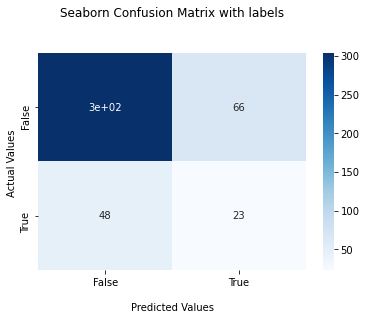

In [76]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_val, val_preds), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

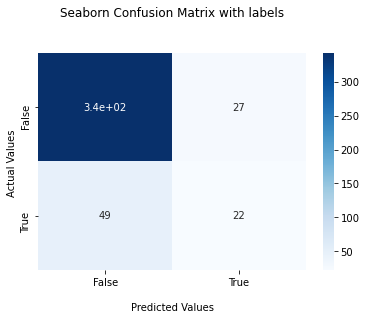

In [77]:
ax = sns.heatmap(confusion_matrix(y_val, clf.predict(X_val)), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_pipe = Pipeline(steps = [('preprocessing',preprocessing),('model',knn_clf)])

In [79]:
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90f1022970>),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
 

In [80]:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
train_preds = knn_pipe.predict(X_train)
val_preds = knn_pipe.predict(X_val)

train_preds_proba = knn_pipe.predict_proba(X_train)
val_preds_proba = knn_pipe.predict_proba(X_val)

print('Training & Validation ROC AUC Scores:\n', '-'*40)
print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_preds_proba[:, 1])))
print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_val, val_preds_proba[:, 1])))
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train, train_preds))
print('Validation confusion matrix:\n', confusion_matrix(y_val, val_preds))
print('Training Accuracy of the model:\n',round(accuracy_score(y_train,train_preds),4))
print('Testing Accuracy of the model:\n',round(accuracy_score(y_val,val_preds),4))
false_positive_rate_knn, true_positive_rate_knn, threshold1_knn = roc_curve(temp, val_preds_proba[:, 1])

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.8949
Validation roc auc score= 0.6546

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[851  12]
 [120  46]]
Validation confusion matrix:
 [[365   5]
 [ 61  10]]
Training Accuracy of the model:
 0.8717
Testing Accuracy of the model:
 0.8503


### Hyper-parameter tuning for KNN

In [81]:
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
start = time.time()
parameters = {'model__n_neighbors':[3,5,10,15,20],'model__weights':['uniform','distance'],'model__metric':['euclidean','manhattan']}
clf=GridSearchCV(knn_pipe,parameters,scoring='roc_auc',n_jobs = -1)
clf.fit(X_train, y_train)
print(clf.best_params_)
predicted=clf.predict(X_val)
proba = clf.predict_proba(X_val)
print('Train Accuracy of the model after hyperparameter tuning')
print(round(accuracy_score(y_train, clf.predict(X_train)),4))
print('Test Accuracy of the model after hyperparameter tuning')
print(round(accuracy_score(y_val, predicted),4))
print('AUC Score of the Train data is:')
print(round(roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]),4))
print('AUC Score of the Test data is:')
print(round(roc_auc_score(y_val, proba[:, 1]),4))
false_positive_rate_knn_hyper, true_positive_rate_knn_hyper, threshold1_knn_hyper = roc_curve(temp, proba[:, 1])
end = time.time()
print('Execution time is:')
print(end - start)

{'model__metric': 'manhattan', 'model__n_neighbors': 20, 'model__weights': 'uniform'}
Train Accuracy of the model after hyperparameter tuning
0.8494
Test Accuracy of the model after hyperparameter tuning
0.8413
AUC Score of the Train data is:
0.8436
AUC Score of the Test data is:
0.769
Execution time is:
0.7196700572967529


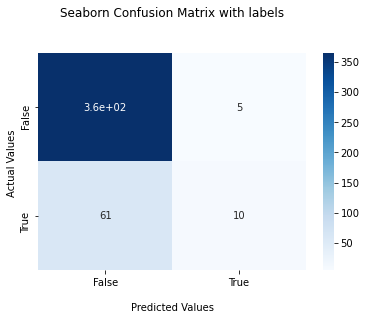

In [85]:
import seaborn as sns

ax = sns.heatmap(confusion_matrix(y_val, val_preds), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

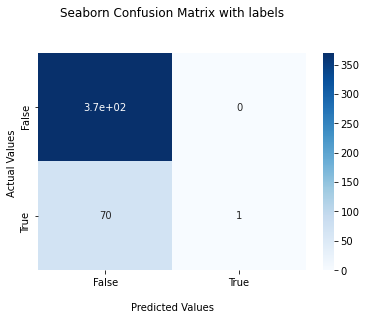

In [86]:
ax = sns.heatmap(confusion_matrix(y_val, clf.predict(X_val)), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Ensemble Models

#### Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_pipe = Pipeline(steps = [('preprocessing',preprocessing),('model',rand_clf)])

In [88]:
rand_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90f1022970>),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
 

In [89]:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
train_preds = rand_pipe.predict(X_train)
val_preds = rand_pipe.predict(X_val)

train_preds_proba = rand_pipe.predict_proba(X_train)
val_preds_proba = rand_pipe.predict_proba(X_val)

print('Training & Validation ROC AUC Scores:\n', '-'*40)
print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_preds_proba[:, 1])))
print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_val, val_preds_proba[:, 1])))
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train, train_preds))
print('Validation confusion matrix:\n', confusion_matrix(y_val, val_preds))
print('Training Accuracy of the model:\n',round(accuracy_score(y_train,train_preds),4))
print('Testing Accuracy of the model:\n',round(accuracy_score(y_val,val_preds),4))
false_positive_rate_random, true_positive_rate_random, threshold1_random = roc_curve(temp, val_preds_proba[:, 1])

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 1.0000
Validation roc auc score= 0.8199

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[863   0]
 [  0 166]]
Validation confusion matrix:
 [[368   2]
 [ 63   8]]
Training Accuracy of the model:
 1.0
Testing Accuracy of the model:
 0.8526


### Hyperparameter tuning for Random Forest Classifier

In [90]:
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
start = time.time()
parameters = {'model__n_estimators':[3,5,7,10,15],'model__max_depth':[5,10,None],'model__max_features':['auto','sqrt','log2']}
clf=GridSearchCV(rand_pipe,parameters,scoring='roc_auc',n_jobs = -1)
clf.fit(X_train, y_train)
print(clf.best_params_)
predicted=clf.predict(X_val)
proba = clf.predict_proba(X_val)
print('Train Accuracy of the model after hyperparameter tuning')
print(round(accuracy_score(y_train, clf.predict(X_train)),4))
print('Test Accuracy of the model after hyperparameter tuning')
print(round(accuracy_score(y_val, predicted),4))
print('AUC Score of the Train data is:')
print(round(roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]),4))
print('AUC Score of the Test data is:')
print(round(roc_auc_score(y_val, proba[:, 1]),4))
end = time.time()
false_positive_rate_random_hyper, true_positive_rate_random_hyper, threshold1_random_hyper = roc_curve(temp, proba[:, 1])
print('Execution time is:')
print(end - start)

{'model__max_depth': 5, 'model__max_features': 'log2', 'model__n_estimators': 15}
Train Accuracy of the model after hyperparameter tuning
0.8678
Test Accuracy of the model after hyperparameter tuning
0.8503
AUC Score of the Train data is:
0.9177
AUC Score of the Test data is:
0.8067
Execution time is:
1.431257724761963


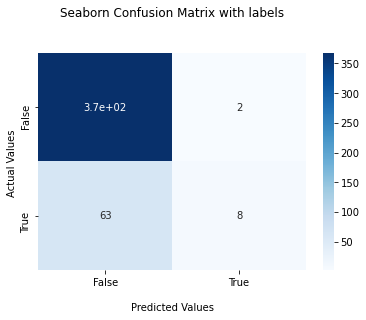

In [91]:
ax = sns.heatmap(confusion_matrix(y_val, val_preds), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

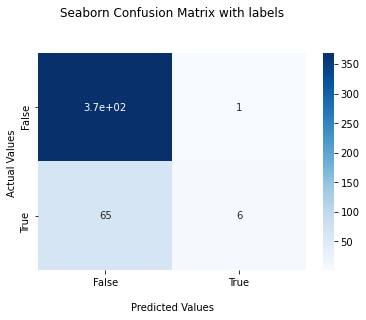

In [92]:
ax = sns.heatmap(confusion_matrix(y_val, clf.predict(X_val)), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticke`t labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Adaboost Classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_pipe = Pipeline(steps = [('preprocessing',preprocessing),('model',ada_clf)])

In [94]:
ada_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90f1022970>),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
 

In [95]:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
train_preds = ada_pipe.predict(X_train)
val_preds = ada_pipe.predict(X_val)

train_preds_proba = ada_pipe.predict_proba(X_train)
val_preds_proba = ada_pipe.predict_proba(X_val)

print('Training & Validation ROC AUC Scores:\n', '-'*40)
print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_preds_proba[:, 1])))
print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_val, val_preds_proba[:, 1])))
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train, train_preds))
print('Validation confusion matrix:\n', confusion_matrix(y_val, val_preds))
print('Training Accuracy of the model:\n',round(accuracy_score(y_train,train_preds),4))
print('Testing Accuracy of the model:\n',round(accuracy_score(y_val,val_preds),4))
false_positive_rate_ada, true_positive_rate_ada, threshold1_ada = roc_curve(temp, val_preds_proba[:,1])

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.9323
Validation roc auc score= 0.7947

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[845  18]
 [ 79  87]]
Validation confusion matrix:
 [[350  20]
 [ 41  30]]
Training Accuracy of the model:
 0.9057
Testing Accuracy of the model:
 0.8617


### Hyperparameter tuning for AdaBoost

In [96]:
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
start = time.time()
parameters = {'model__n_estimators':[5,10,50,100,500]}
clf=GridSearchCV(ada_pipe,parameters,scoring='roc_auc',cv=7,n_jobs = -1)
clf.fit(X_train, y_train)
print(clf.best_params_)
predicted=clf.predict(X_val)
proba = clf.predict_proba(X_val)
print('Train Accuracy of the model after hyperparameter tuning')
print(round(accuracy_score(y_train, clf.predict(X_train)),4))
print('Test Accuracy of the model after hyperparameter tuning')
print(round(accuracy_score(y_val, predicted),4))
print('AUC Score of the Train data is:')
print(round(roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]),4))
print('AUC Score of the Test data is:')
print(round(roc_auc_score(y_val, proba[:, 1]),4))
false_positive_rate_ada_hyper, true_positive_rate_ada_hyper, threshold1_ada_hyper = roc_curve(temp, proba[:, 1])
end = time.time()
print('Execution time is:')
print(end - start)

{'model__n_estimators': 50}
Train Accuracy of the model after hyperparameter tuning
0.9057
Test Accuracy of the model after hyperparameter tuning
0.8617
AUC Score of the Train data is:
0.9323
AUC Score of the Test data is:
0.7947
Execution time is:
2.833677053451538


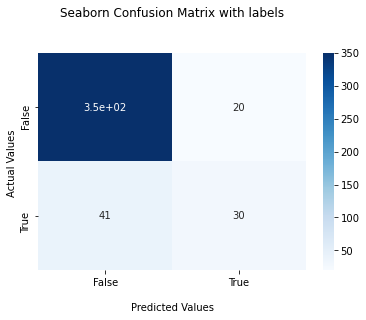

In [97]:
ax = sns.heatmap(confusion_matrix(y_val, val_preds), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

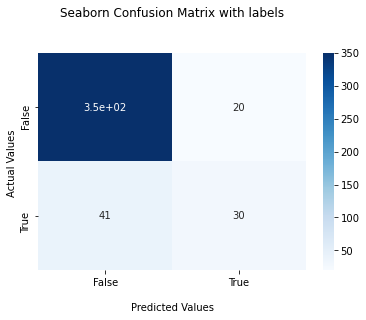

In [98]:
ax = sns.heatmap(confusion_matrix(y_val, clf.predict(X_val)), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticke`t labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Support Vector Machines

In [99]:
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_pipe = Pipeline(steps = [('preprocessing',preprocessing),('model',svm_clf)])

In [100]:
svm_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f90f1022970>),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
 

In [101]:
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
train_preds = svm_pipe.predict(X_train)
val_preds = svm_pipe.predict(X_val)

train_preds_proba = svm_pipe.predict_proba(X_train)
val_preds_proba = svm_pipe.predict_proba(X_val)

print('Training & Validation ROC AUC Scores:\n', '-'*40)
print('Training   roc auc score= {:.4f}'.format(roc_auc_score(y_train, train_preds_proba[:, 1])))
print('Validation roc auc score= {:.4f}'.format(roc_auc_score(y_val, val_preds_proba[:, 1])))
print('')
print('Training & Validation Confusion Metrices:')
print('Training   confusion matrix:\n', confusion_matrix(y_train, train_preds))
print('Validation confusion matrix:\n', confusion_matrix(y_val, val_preds))
print('Training Accuracy of the model:\n',round(accuracy_score(y_train,train_preds),4))
print('Testing Accuracy of the model:\n',round(accuracy_score(y_val,val_preds),4))
false_positive_rate_svm, true_positive_rate_svm, threshold1_svm = roc_curve(temp, val_preds_proba[:,1])

Training & Validation ROC AUC Scores:
 ----------------------------------------
Training   roc auc score= 0.9587
Validation roc auc score= 0.8324

Training & Validation Confusion Metrices:
Training   confusion matrix:
 [[863   0]
 [115  51]]
Validation confusion matrix:
 [[370   0]
 [ 65   6]]
Training Accuracy of the model:
 0.8882
Testing Accuracy of the model:
 0.8526


### Hyperparameter tuning for Support Vector Machines 

In [102]:
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
start = time.time()
parameters = {'model__C':[0.1, 1, 10, 100, 1000],'model__gamma':[1, 0.1, 0.01, 0.001, 0.0001]}
clf=GridSearchCV(svm_pipe,parameters,scoring='roc_auc',cv=3,n_jobs = -1)
clf.fit(X_train, y_train)
print(clf.best_params_)
predicted=clf.predict(X_val)
proba = clf.predict_proba(X_val)
print('Train Accuracy of the model after hyperparameter tuning')
print(round(accuracy_score(y_train, clf.predict(X_train)),4))
print('Test Accuracy of the model after hyperparameter tuning')
print(round(accuracy_score(y_val, predicted),4))
print('AUC Score of the Train data is:')
print(round(roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]),4))
print('AUC Score of the Test data is:')
print(round(roc_auc_score(y_val, proba[:, 1]),4))
false_positive_rate_svm_hyper, true_positive_rate_svm_hyper, threshold1_svm_hyper = roc_curve(temp, proba[:, 1])
end = time.time()
print('Execution time is:')
print(end - start)

{'model__C': 100, 'model__gamma': 0.01}
Train Accuracy of the model after hyperparameter tuning
0.9155
Test Accuracy of the model after hyperparameter tuning
0.8912
AUC Score of the Train data is:
0.91
AUC Score of the Test data is:
0.8509
Execution time is:
2.6482319831848145


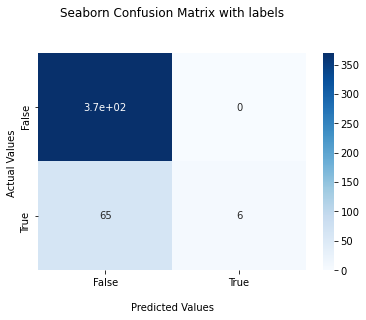

In [103]:
ax = sns.heatmap(confusion_matrix(y_val, val_preds), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

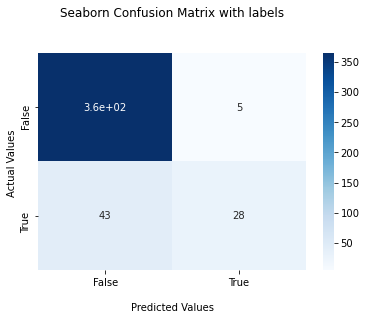

In [104]:
ax = sns.heatmap(confusion_matrix(y_val, clf.predict(X_val)), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticke`t labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### ROC Curves

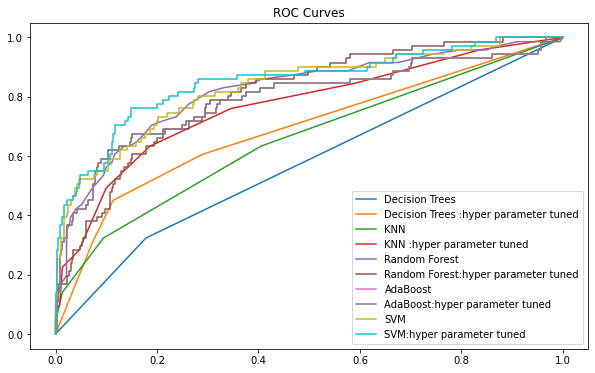

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(false_positive_rate_dec, true_positive_rate_dec,Label = 'Decision Trees')
plt.plot(false_positive_rate_dec_hyper, true_positive_rate_dec_hyper,Label = 'Decision Trees :hyper parameter tuned')
plt.plot(false_positive_rate_knn, true_positive_rate_knn,Label = 'KNN')
plt.plot(false_positive_rate_knn_hyper, true_positive_rate_knn_hyper,Label = 'KNN :hyper parameter tuned')
plt.plot(false_positive_rate_random, true_positive_rate_random,Label = 'Random Forest')
plt.plot(false_positive_rate_random_hyper, true_positive_rate_random_hyper,Label = 'Random Forest:hyper parameter tuned')
plt.plot(false_positive_rate_ada, true_positive_rate_ada,Label = 'AdaBoost')
plt.plot(false_positive_rate_ada_hyper, true_positive_rate_ada_hyper,Label = 'AdaBoost:hyper parameter tuned')
plt.plot(false_positive_rate_svm, true_positive_rate_svm,Label = 'SVM')
plt.plot(false_positive_rate_svm_hyper, true_positive_rate_svm_hyper,Label = 'SVM:hyper parameter tuned')
plt.title('ROC Curves')
plt.legend()
plt.show()

Insight